In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


## LINEAR REGRESSION

In [3]:
data['mean_sales'] = data['Sale_Price'].mean()  #MEAN REGRESSION MODEL
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

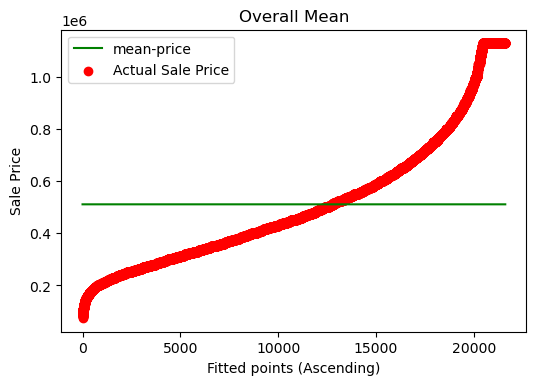

In [4]:
plt.figure( dpi = 100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt. plot(k, data['mean_sales'].sort_values(), color = 'green', label = 'mean-price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend()

In [5]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [6]:
#making a new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column 
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
data['grade_mean'].head()

<ipython-input-6-975717d1aaf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
<ipython-input-6-975717d1aaf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [7]:
gradewise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade']== i]
    gradewise_list.append(k)

In [8]:
classwise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

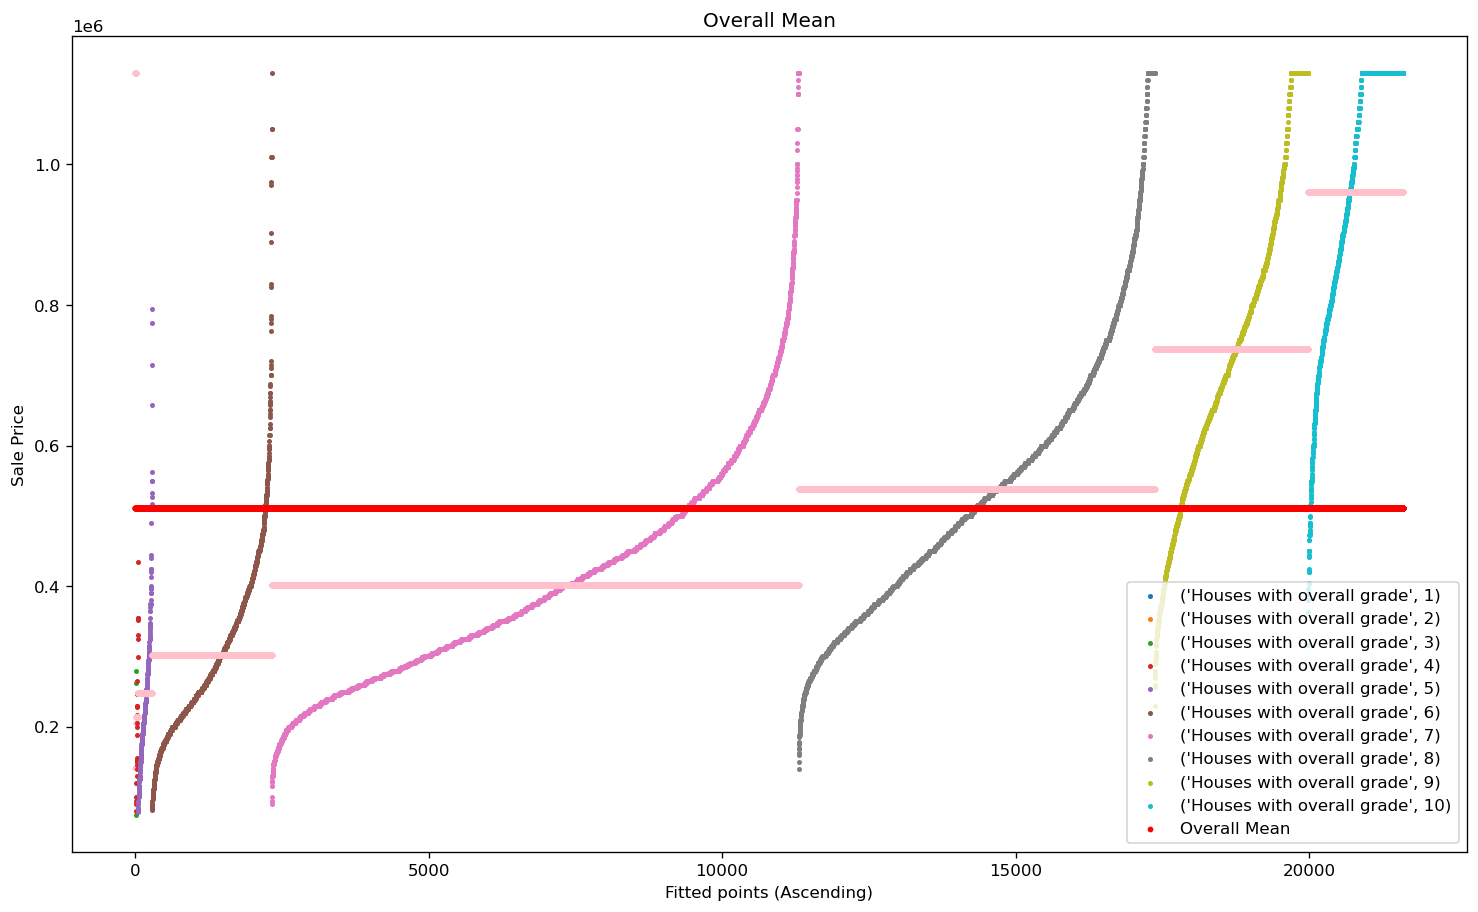

In [9]:
plt.figure (dpi =120, figsize = (15,9))

#### Plotting 'Sale_Price' gradewise ####
# z variable is for x-axis

z = 0
for i in range(1,11):
    # deffing x-axis using z
    points = [k for k in range(z, z+ len(classwise_list[i-1]))]
    # plotting
    plt.scatter( points,
               classwise_list[i-1].sort_values(),
               label = ('Houses with overall grade', i), s=4)
    # Plotting gradewise mean
    plt.scatter( points,
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
               s = 6, color = 'pink'
               )
    z = max(points) + 1
    
#### plotting overall mean ####
plt.scatter([q for q in range(0,z)],
           data['mean_sales'],
            color = 'red',
           label = 'Overall Mean',
           s=6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc=4)

# RESIDUAL PLOT

In [10]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

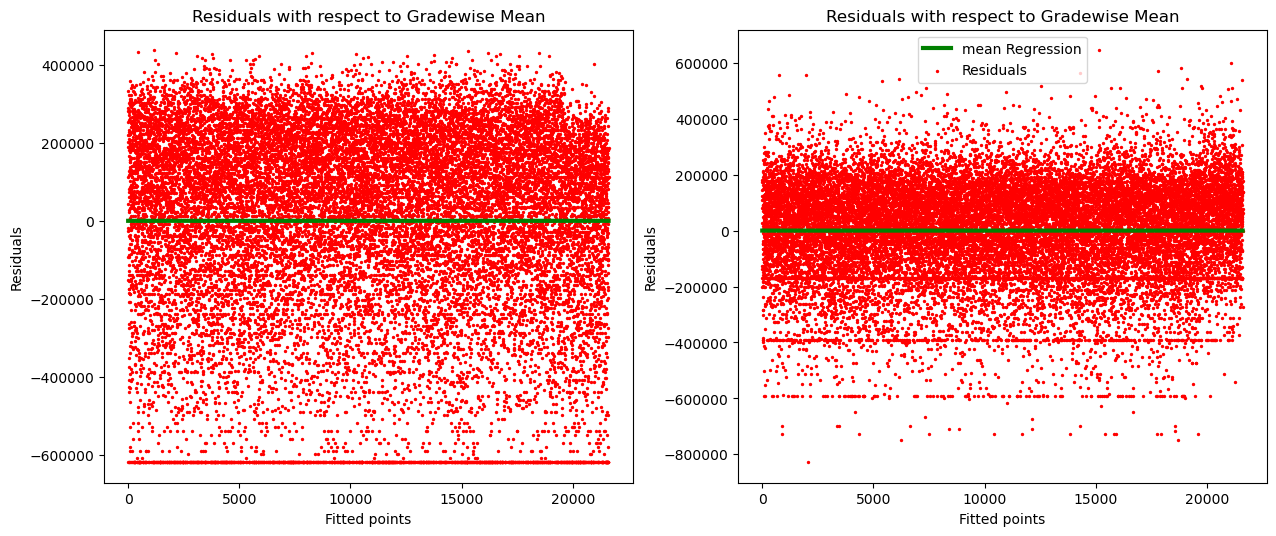

In [11]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color = 'red', label = 'Residuals', s=2)
plt.plot(k, l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title('Residuals with respect to Gradewise Mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color = 'red', label = 'Residuals', s=2)
plt.plot(k, l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals with respect to Gradewise Mean')

plt.legend()

In [12]:
cost = sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [13]:
Y = data['Sale_Price']
Y_hat1 = data['mean_sales']
Y_hat2 = data['grade_mean']
n = len(data)

len(Y) , len(Y_hat1) , len(Y_hat2) , n

(21609, 21609, 21609, 21609)

In [14]:
cost_mean = sum(abs(Y_hat1- Y))/n
cost_mean

199168.78146839526

In [15]:
cost_grade_mean = sum(abs(Y_hat2 - Y))/n
cost_grade_mean

137081.70298203363

In [16]:
#calculate MAE using sklearn
from sklearn.metrics import mean_absolute_error as mae
cost_grade_mean = mae(Y_hat2,Y)
cost_grade_mean

137081.7029820291

In [17]:
from sklearn.metrics import mean_squared_error as mse
cost_mean = mse(Y_hat1,Y)
cost_grade_mean = mse(Y_hat2,Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [18]:
from sklearn.metrics import mean_squared_error as mse
cost_mean = mse(Y_hat1,Y)**.5
cost_grade_mean = mse(Y_hat2,Y)**.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [19]:
Y = data['Sale_Price']
Y_bar = data['mean_sales']
Y_hat = data['grade_mean']
n= len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [20]:
mse_mean = mse(Y_bar,Y)
mse_mean

62528116847.799576

In [21]:
mse_model = mse(Y_hat,Y)
mse_model

30804835720.342426

In [22]:
R2 = 1- (mse_model / mse_mean)
R2

0.5073442592981836

In [23]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)

sample_data = pd.DataFrame({'sale_price' : sale_price, 'flat_area' : flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


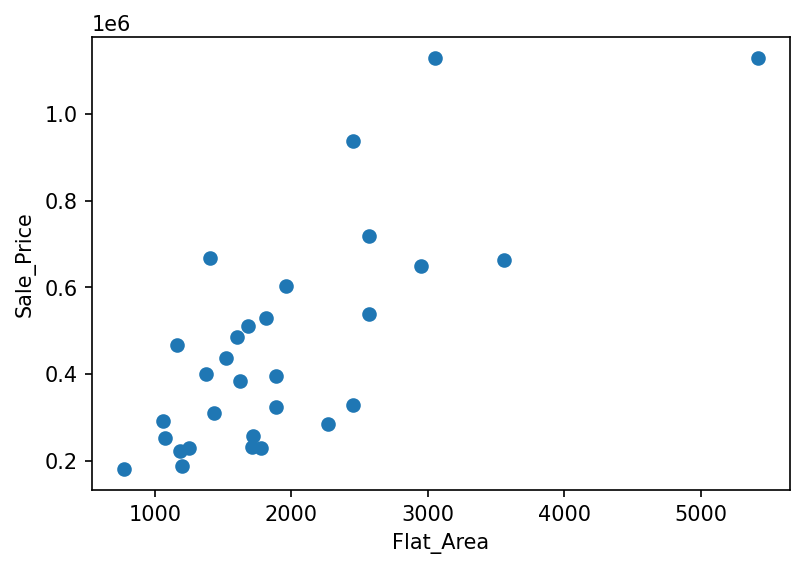

In [24]:
plt.figure( dpi = 150 )
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.show()

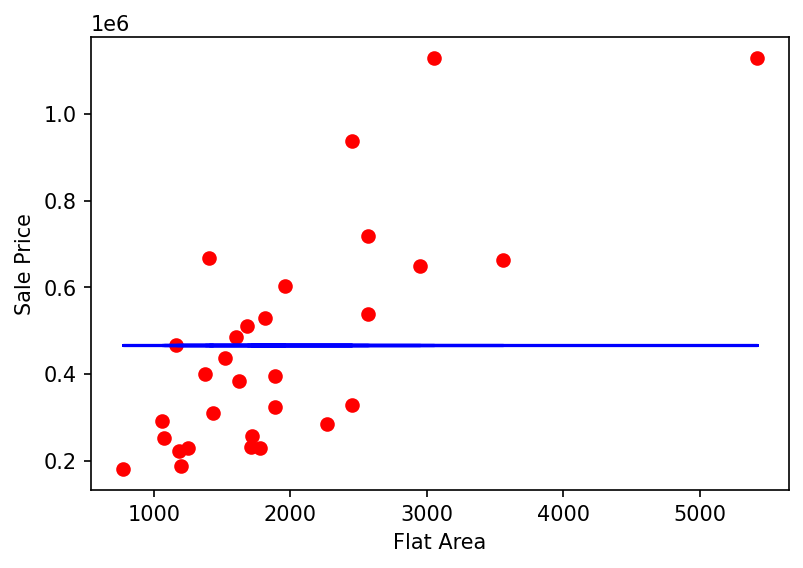

In [25]:

sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='r')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color='b', label = 'Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.show()

Text(0.5, 1.0, 'Slope 0 with MSE281372081125.0')

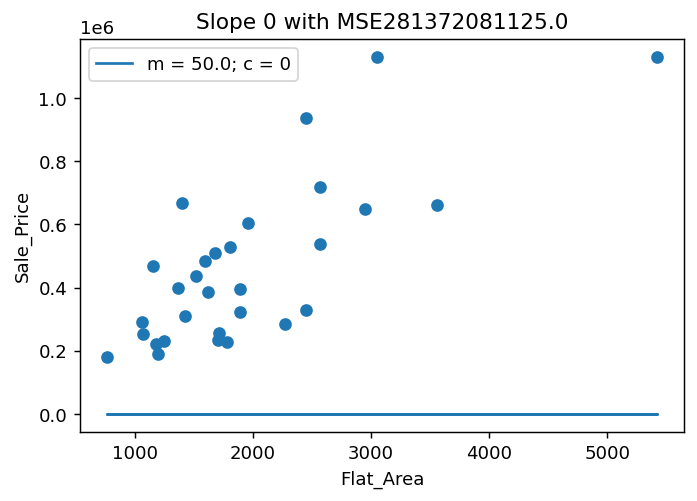

In [26]:
c = 0
m = 0

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)


plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area,line, label = 'm = 50.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope '+str(m)+' with MSE'+str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

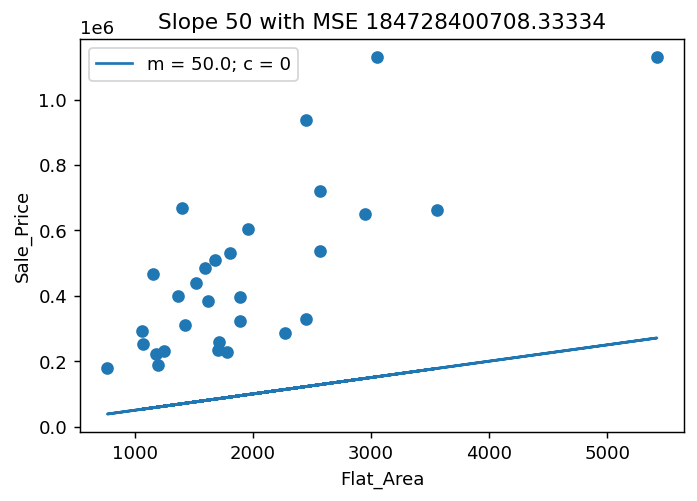

In [27]:
c = 0
m = 50

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)


plt.figure(dpi=130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area,line, label = 'm = 50.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope '+str(m)+' with MSE '+str(MSE))

In [28]:
def slope_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    
    MSE = mse(sample_data.sale_price, sale)
    return MSE


In [29]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept=0, sample_data=sample_data)
    Cost.append(cost)

In [30]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


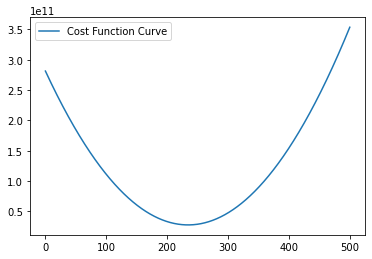

In [31]:
# Plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel = 'Value of Slope'
plt.ylabel = 'Cost'
plt.legend()

In [32]:
def intercept_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [33]:
intercept = [i for i in range(5000, 50000)]
Cost = []
for i in intercept:
    cost = intercept_error(slope = 234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [34]:
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


TypeError: 'str' object is not callable

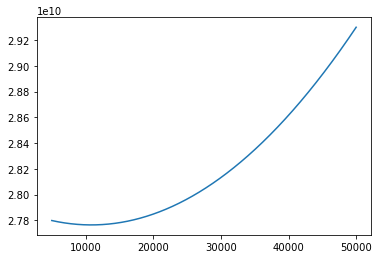

In [35]:
# plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [36]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error( slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [37]:
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})

In [38]:
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'intercept'

In [39]:
new_intercept = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

229.7

In [40]:
def param_init(Y):
    
    m = 0.1
    c = Y.mean()
    return m,c

In [41]:
def gen_pre(m,c,X):
    prediction = []
    for x in X:
        pred = (m * x) +c
        prediction.append(pred)
    return prediction

In [42]:
def compute_cost(prediction, Y):
    cost = np.sum(((prediction - Y)**2/len(Y)))
    return cost

In [43]:
def gradients(prediction, X, Y):
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm, Gc

In [44]:
def par_up(m_old, c_old, Gm_old, Gc_old, alpha):
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha *Gc_old
    return m_new, c_new

In [46]:
def result(m, c, X, Y, cost, predictions, i):
    # If the gradient Descent converged to the optimum value before max_iter
    if i < max_iter - 1:
        print("Gradient Descent has Converged at iteration {}".format(i))
    else:
        print("Result after", max_iter, 'iteration is')
        
    # Plotting the final result 
    plt.figure(figsize = (14,7), dpi = 120)
    plt.scatter(X,Y,color = 'red', label = 'data points')
    label = 'final regression line: m= {}; c= {}'.format(str(m),str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')

    plt.legend()

after iteration 0 : m = -4323708482.605556 :c =  456718.27966666664 ; Cost = 64177937552.075005
Gradient Descent has Converged at iteration 0


TypeError: 'str' object is not callable

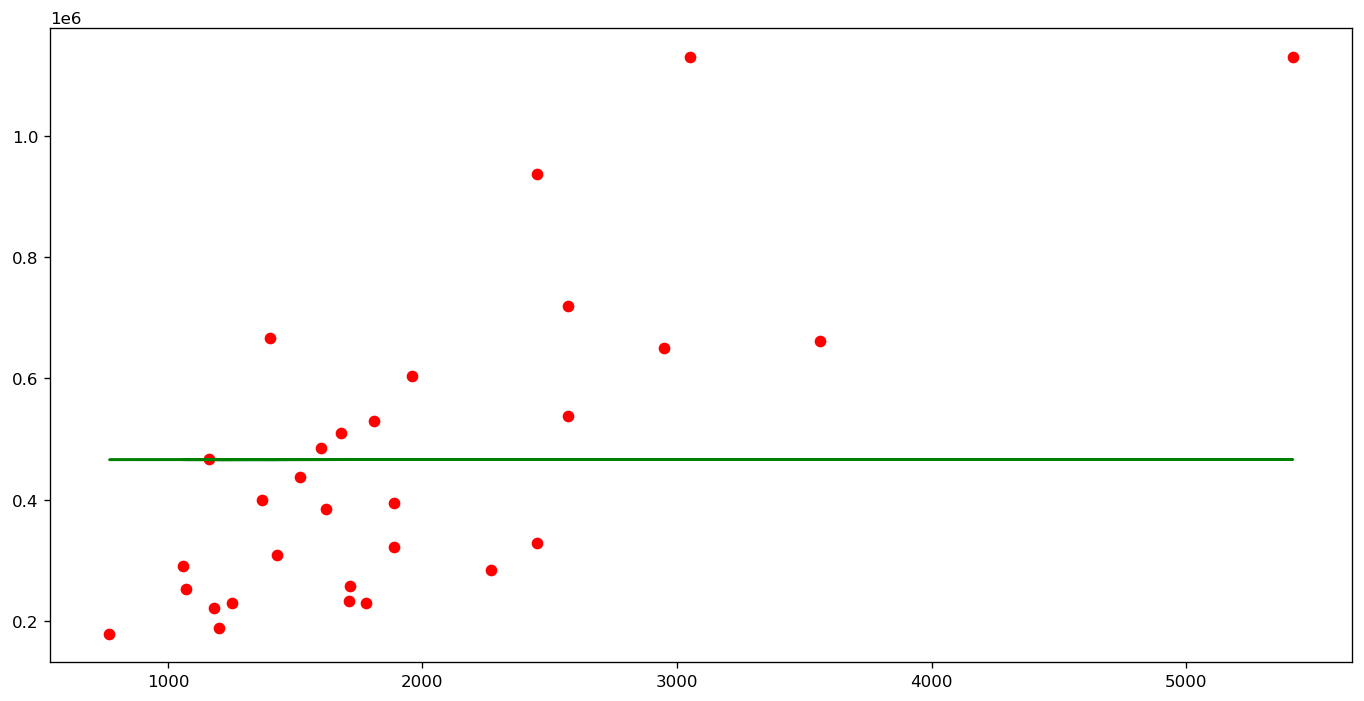

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# defining and reshaping our dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

# declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

# step 1: initializing the values of m,c
m, c = param_init(sale_price)

# Gradient descent in action
for i in range(0, max_iter):
    #generating predictions
    predictions = gen_pre(m,c,flat_area)
    
    # step 3: calculating cost 
    cost_new = compute_cost(predictions, sale_price)
    
    # checking if GD converged
    if abs(cost_new - cost_old) < 10**(-7):
        break
        
    # calculating gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    # step 4: updating parameters m and c
    m, c = par_up(m,c,Gm,Gc,alpha)
    
    # display result after every 20 iterations
    if i%20 == 0:
        print("after iteration",i,': m =',m,':c = ',c,'; Cost =',cost_new)
        
        
    # updating cost_old
    cost_old = cost_new
    
    
    # final result
    result(m,c,flat_area,sale_price,cost_new,predictions,i)